##### Project Brief
You work for Spark Funds, an asset management company. Spark Funds wants to make 
investments in a few companies. The CEO of Spark Funds wants to understand the global trends 
in investments so that she can take the investment decisions effectively.


##### Business and Data Understanding
Spark Funds has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of 
communication with the companies it would invest in

 For your analysis, consider a country to be English speaking only if English is one of the 
official languages in that country

 You may use this list: Click here for a list of countries where English is an official 
language.

These conditions will give you sufficient information for your initial analysis. Before getting to 
specific questions, let’s understand the problem and the data first

**Importing libraries**

In [1]:
# pandas and numpy
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

# warnings
import warnings
warnings.filterwarnings('ignore')

#set style
sb.set(style="darkgrid")

**Importing the data**

In [2]:
companies = pd.read_csv('companies.txt',sep='\t',encoding='ISO-8859-1')
rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
mapping = pd.read_csv('mapping.csv')

In [3]:
english = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language')
print(type(english))

<class 'list'>


In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


##### Checkpoints - Part 1

**Checkpoint 1: Data Cleaning 1**

**INDUSTRIAL ASSIGNMENT**

1. How many unique companies are present in rounds2? 

In [7]:
rounds2['company_permalink'].value_counts()

/ORGANIZATION/SOLARFLARE                                       10
/ORGANIZATION/EXAGEN-DIAGNOSTICS                                9
/organization/quellan                                           9
/organization/semprius                                          9
/ORGANIZATION/SEMPRIUS                                          9
                                                               ..
/organization/gumhouse                                          1
/organization/gumbuya                                           1
/ORGANIZATION/GUMBUYA                                           1
/organization/gumball                                           1
/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic     1
Name: company_permalink, Length: 90247, dtype: int64

In [8]:
rounds2['company_permalink']=rounds2['company_permalink'].apply(str.lower)

In [9]:
print('Unique companies present in rounds2 are',len(rounds2['company_permalink'].unique()))

Unique companies present in rounds2 are 66370


2. How many unique companies are present in companies?

In [10]:
companies['permalink'].value_counts()

/Organization/-Fame                                            1
/Organization/Pmedianetwork                                    1
/Organization/Pluristem-Therapeutics                           1
/Organization/Plurogen-Therapeutics                            1
/Organization/Pluromed                                         1
                                                              ..
/Organization/Galxyz                                           1
/Organization/Gamaby                                           1
/Organization/Gamador                                          1
/Organization/Gamaliel                                         1
/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-Hizmetleri-Tic    1
Name: permalink, Length: 66368, dtype: int64

In [11]:
companies['permalink']=companies['permalink'].apply(str.lower)

In [12]:
print('Unique companies present in companies are',len(companies['permalink'].unique()))

Unique companies present in companies are 66368


3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

In [13]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [14]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [15]:
companies.shape

(66368, 10)

In [16]:
companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

**Permalink column has has 66368 Unique companies and no null values so it can used as Primary or Unique Key**

4. Are there any companies in the rounds2 file which are not present in companies? 
Answer yes or no: Y/N

In [17]:
a = list(companies['permalink'].unique())
b = list(rounds2['company_permalink'].unique())
if b not in a:
    print('Yes')
else:
    print('No')

Yes


*Yes,There are companies the rounds2 file which is not present in companies.*

5. Merge the two data frames so that all variables (columns) in 
the companies frame are added to the rounds2 data frame. Name the merged 
frame master_frame. How many observations are present in master_frame?

In [18]:
# renaming the column
rounds2.rename(columns={'company_permalink':'permalink'},inplace=True)

In [19]:
rounds2.head(0)

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [138]:
# merging the two datas
master_frame = pd.merge(companies,rounds2,on='permalink',how='inner')

In [21]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [22]:
master_frame.shape

(114942, 15)

##### Data Cleaning

*Null Values*

In [23]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [24]:
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64


In [139]:
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at'], axis = 1)

In [26]:
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,2000000.0


In [27]:
master_frame.isnull().sum()

permalink                 0
name                      1
category_list          3407
status                    0
country_code           8671
funding_round_type        0
raised_amount_usd     19984
dtype: int64

In [28]:
master_frame['raised_amount_usd'].describe()

count    9.495800e+04
mean     1.042696e+07
std      1.148218e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680521e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [29]:
master_frame.dropna(inplace=True)

In [30]:
master_frame.shape

(88528, 7)

In [31]:
master_frame.isnull().sum()

permalink             0
name                  0
category_list         0
status                0
country_code          0
funding_round_type    0
raised_amount_usd     0
dtype: int64

##### Checkpoint 2: Funding Type Analysis

This is the first of the three goals of data analysis – investment type analysis.

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, 
corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few 
million USD to a billion USD), and so on. For example, seed, angel and venture are three 
common stages of startup funding.


Considering the constraints of Spark Funds, you have to decide one funding type which is most 
suitable for them.

##### 2.1

1. Calculate the most representative value of the investment amount for each of the four 
funding types (venture, angel, seed, and private equity) and report the answers in Table 


2. Based on the most representative investment amount calculated above, which investment 
type do you think is the most suitable for Spark Funds?

In [32]:
master_frame.head(3)

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,2000000.0


In [33]:
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21094
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [34]:
#Retaining the rows with only four investment types
investment_types = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel') | (master_frame['funding_round_type'] == 'private_equity')]
investment_types.head(3)

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,2000000.0


In [35]:
#Converting $ to million $.
investment_types['raised_amount_usd'] = investment_types['raised_amount_usd']/1000000
investment_types.head()

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10.000000
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,0.700000
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,2.000000
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,seed,0.043360
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,venture,0.719491


In [36]:
pd.pivot_table(investment_types,values='raised_amount_usd',columns='funding_round_type',aggfunc='mean')

funding_round_type,angel,private_equity,seed,venture
raised_amount_usd,0.971574,73.938486,0.747828,11.724223


In [79]:
# compare the median investment amount across the types
investment_types.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    73.938486
venture           11.724223
angel              0.971574
seed               0.747828
Name: raised_amount_usd, dtype: float64

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment 
round, which investment type is the most suitable for it? Identify the investment type and, for 
further analysis, filter the data so it only contains the chosen investment type

*venture and private_equity investment type is the most suitable for investing because it amount is between 5 to 15 million USD.*

### Checkpoints - Part 2

### Checkpoint 3: Country Analysis

This is the second goal of analysis — country analysis.

Now that you know the type of investment suited for Spark Funds, let's narrow down the 
countries.

Spark Funds wants to invest in countries with the highest amount of funding for the chosen 
investment type. This is a part of its broader strategy to invest where most investments are 
occurring.

1. Spark Funds wants to see the top nine countries which have received the highest total 
funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named top9 with the top nine 
countries (based on the total investment amount each country has received)

In [38]:
english[0]

,Country,ISO code,Geographic region,Population1,Primary language?
0,Antigua and Barbuda,ATG,Caribbean,85000,Yes (English-based creole language)
1,The Bahamas[1],BHS,Caribbean,331000,Yes (English-based creole language)
2,Barbados[2],BRB,Caribbean,294000,Yes (English-based creole language)
3,Belize[3],BLZ,Central America,288000,Yes (English-based creole language)
4,Botswana[3],BWA,Africa,1882000,Yes
5,Burundi[4],BDI,Africa,10114505,No
6,Cameroon[1],CMR,Africa,22534532,"No (co-official with French, but only spoken p..."
7,Canada,CAN,North America,38048738,"Yes (Co-official with French, and a predominan..."
8,Dominica[1],DMA,Caribbean,73000,Yes (French-based creole language)
9,Eswatini[1],SWZ,Africa,1141000,No


In [39]:
english[1]

,Country,ISO code,Geographic region,Population1,Primary language?
0,Australia,AUS,Oceania,25795700,Yes
1,New Zealand[24],NZL,Oceania,4893830,Yes
2,United Kingdom,GBR,Europe,66040229,Yes
3,United States,USA,North America,328239523,Yes


In [40]:
country_analysis = pd.pivot_table(investment_types,values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
country_analysis = country_analysis.sort_values(by = 'raised_amount_usd', ascending = False)
country_analysis[:9]

,raised_amount_usd
country_code,
USA,508473.909940
CHN,61000.915923
GBR,26899.805686
IND,21049.113815
CAN,13168.914172
DEU,8580.103249
ISR,8101.823269
FRA,8078.613828
NLD,5058.483750


**Identify the top three English-speaking countries in the data frame top9.**

In [41]:
english_3 = investment_types[(investment_types['country_code'] == 'USA')
                            |(investment_types['country_code'] == 'GBR')
                            |(investment_types['country_code'] == 'IND')]

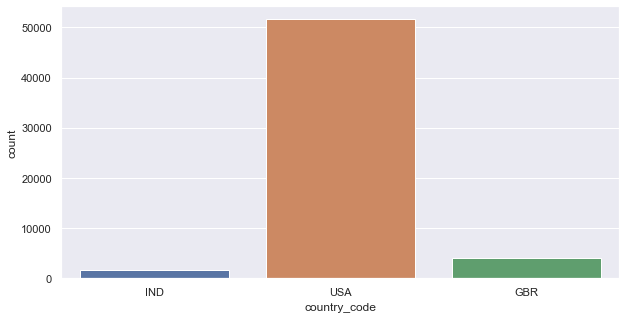

In [105]:
plt.figure(figsize=(10,5))
sb.countplot(english_3['country_code'])
plt.show()

##### Checkpoint 4: Sector Analysis 1

1. Extract the primary sector of each category list from the category_list column

2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main 
sectors (Note that ‘Others’ is also considered one of the main sectors)

In [43]:
english_3.head(3)

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,0.7
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,seed,3.0


In [44]:
#Extracting the primary vector value
english_3['primary_sector'] = english_3['category_list'].apply(lambda x: x.split('|')[0])

In [45]:
english_3.head(3)

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,venture,10.0,Media
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,0.7,Application Platforms
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,seed,3.0,Analytics


In [46]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [47]:
# missing values in mapping file
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [48]:
# missing values in mapping file
mapping.dropna(inplace=True)

In [49]:
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [50]:
mapping['category_list'].unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bankin

In [51]:
mapping.rename(columns={'category_list':'primary_sector'},inplace=True)

In [52]:
mapping.columns

Index(['primary_sector', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [53]:
#Reshaping the mapping dataframe to merge with the master_frame dataframe. Using melt() function to unpivot the table.
mapping = pd.melt(mapping, id_vars =['primary_sector'], value_vars =['Manufacturing','Automotive & Sports','Blanks',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 


In [54]:
mapping.head()

,primary_sector,variable,value
0,3D,Manufacturing,1
1,3D Printing,Manufacturing,1
2,3D Technology,Manufacturing,1
3,Accounting,Manufacturing,0
4,Active Lifestyle,Manufacturing,0


In [55]:
# remove rows having value=0
mapping = mapping[mapping['value']==1]
mapping = mapping.drop('value', axis=1)

In [56]:
mapping.head()

,primary_sector,variable
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
6,Advanced Materials,Manufacturing
14,Agriculture,Manufacturing


In [57]:
mapping.shape

(687, 2)

In [58]:
# merge the data frames
sector_analysis = pd.merge(english_3, mapping, how='inner', on='primary_sector')
sector_analysis.head()

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,primary_sector,variable
0,/organization/-fame,#fame,Media,operating,IND,venture,10.0,Media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,15.0,Media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,5.8,Media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,18.0,Media,Entertainment
4,/organization/all-day-media,ALL DAY MEDIA,Media|Social Media,operating,USA,seed,2.0,Media,Entertainment


In [59]:
sector_analysis.shape

(52867, 9)

In [60]:
sector_analysis.isnull().sum()

permalink             0
name                  0
category_list         0
status                0
country_code          0
funding_round_type    0
raised_amount_usd     0
primary_sector        0
variable              0
dtype: int64

In [61]:
sector_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52867 entries, 0 to 52866
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           52867 non-null  object 
 1   name                52867 non-null  object 
 2   category_list       52867 non-null  object 
 3   status              52867 non-null  object 
 4   country_code        52867 non-null  object 
 5   funding_round_type  52867 non-null  object 
 6   raised_amount_usd   52867 non-null  float64
 7   primary_sector      52867 non-null  object 
 8   variable            52867 non-null  object 
dtypes: float64(1), object(8)
memory usage: 4.0+ MB


### Checkpoint 5: Sector Analysis 2

Now you have a data frame with each company’s main sector (main_sector) mapped to it. When 
we say sector analysis, we refer to one of the eight main sectors.

Also, you know the top three English speaking countries and the most suitable funding type for 
Spark Funds. Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the 
funding type 'FT'.

Also, the range of funding preferred by Spark Funds is 5 to 15 million USD.

Now, the aim is to find out the most heavily invested main sectors in each of the three countries 
(for funding type FT and investments range of 5-15 M USD).

1. Create three separate data frames D1, D2 and D3 for each of the three countries 
containing the observations of funding type FT falling within the 5-15 million USD 
range. The three data frames should contain:
    
 All the columns of the master_frame along with the primary sector and the main sector

 The total number (or count) of investments for each main sector in a separate column

 The total amount invested in each main sector in a separate column
Using the three data frames, you can calculate the total number and amount of investments in 
each main sector.

In [62]:
sector_analysis.head()

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,primary_sector,variable
0,/organization/-fame,#fame,Media,operating,IND,venture,10.0,Media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,15.0,Media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,5.8,Media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,18.0,Media,Entertainment
4,/organization/all-day-media,ALL DAY MEDIA,Media|Social Media,operating,USA,seed,2.0,Media,Entertainment


In [63]:
D1 = sector_analysis[(sector_analysis['country_code'] == 'USA') & (sector_analysis['raised_amount_usd'] >= 5) & (sector_analysis['raised_amount_usd'] <= 15)]
D2 = sector_analysis[(sector_analysis['country_code'] == 'GBR') & (sector_analysis['raised_amount_usd'] >= 5) & (sector_analysis['raised_amount_usd'] <= 15)]
D3 = sector_analysis[(sector_analysis['country_code'] == 'IND') & (sector_analysis['raised_amount_usd'] >= 5) & (sector_analysis['raised_amount_usd'] <= 15)]

In [69]:
D1_sum_count = D1[['raised_amount_usd','primary_sector']].groupby('primary_sector').raised_amount_usd.agg(['sum', 'count'])
D2_sum_count = D2[['raised_amount_usd','primary_sector']].groupby('primary_sector').raised_amount_usd.agg(['sum', 'count'])
D3_sum_count = D3[['raised_amount_usd','primary_sector']].groupby('primary_sector').raised_amount_usd.agg(['sum', 'count'])

In [70]:
D1_sum_count

,sum,count
primary_sector,,
3D,153.618298,19
3D Printing,36.800000,5
3D Technology,31.000000,3
Accounting,251.148093,26
Active Lifestyle,17.000000,3
...,...,...
Web Tools,10.800000,1
Wine And Spirits,10.170000,2
Wireless,12.000000,1


In [196]:
D1_sum_count

raised_amount_usd            
                      Total_amount Total_count
primary_sector                                
3D                      153.618298          19
3D Printing              36.800000           5
3D Technology            31.000000           3
Accounting              251.148093          26
Active Lifestyle         17.000000           3
...                            ...         ...
Web Tools                10.800000           1
Wine And Spirits         10.170000           2
Wireless                 12.000000           1
iPad                      7.000000           1
iPhone                   32.750000           4

[395 rows x 2 columns]

In [197]:
D1.shape

(11577, 9)

In [72]:
D1.shape

(11577, 11)

In [76]:
# groupby country, sector and compute the count and sum
sector_analysis.groupby(['country_code', 'variable']).raised_amount_usd.agg(['count', 'sum']).sort_values(by='sum',ascending=False)

count            sum
country_code variable                                                     
USA          Cleantech / Semiconductors                8992  137464.711749
             Others                                   11551  100261.967200
             Social, Finance, Analytics, Advertising   8620   75936.119846
             News, Search and Messaging                7129   52492.992716
             Health                                    4293   39117.254040
             Manufacturing                             3242   30185.325576
             Entertainment                             3027   23650.422633
             Automotive & Sports                        864   15217.444177
IND          Others                                     515    9471.720187
GBR          Others                                     952    6384.174153
             Cleantech / Semiconductors                 524    5873.392556
             News, Search and Messaging                 617    4398.853416
             Social, Finance, Analytics, Advertising    800    3404.019443
IND          News, Search and Messaging                 271    2794.709039
             Cleantech / Semiconductors                  83    2491.414633
             Automotive & Sports                         55    1672.660687
GBR          Entertainment                              346    1589.347375
             Manufacturing                              207    1332.536890
             Health                                     183    1329.435221
IND          Entertainment                              144    1273.556365
             Social, Finance, Analytics, Advertising    199     957.050843
             Manufacturing                               89     904.587786
             Health                                      80     643.658792
GBR          Automotive & Sports                         84     535.717287

In [77]:
sector_analysis.groupby(['country_code', 'variable']).raised_amount_usd.agg(['count', 'sum'])

count            sum
country_code variable                                                     
GBR          Automotive & Sports                         84     535.717287
             Cleantech / Semiconductors                 524    5873.392556
             Entertainment                              346    1589.347375
             Health                                     183    1329.435221
             Manufacturing                              207    1332.536890
             News, Search and Messaging                 617    4398.853416
             Others                                     952    6384.174153
             Social, Finance, Analytics, Advertising    800    3404.019443
IND          Automotive & Sports                         55    1672.660687
             Cleantech / Semiconductors                  83    2491.414633
             Entertainment                              144    1273.556365
             Health                                      80     643.658792
             Manufacturing                               89     904.587786
             News, Search and Messaging                 271    2794.709039
             Others                                     515    9471.720187
             Social, Finance, Analytics, Advertising    199     957.050843
USA          Automotive & Sports                        864   15217.444177
             Cleantech / Semiconductors                8992  137464.711749
             Entertainment                             3027   23650.422633
             Health                                    4293   39117.254040
             Manufacturing                             3242   30185.325576
             News, Search and Messaging                7129   52492.992716
             Others                                   11551  100261.967200
             Social, Finance, Analytics, Advertising   8620   75936.119846

In [210]:
sector_analysis.groupby(['country_code', 'primary_sector']).raised_amount_usd.agg(['count', 'sum'])

count         sum
country_code primary_sector                     
GBR          3D                   12   23.815744
             3D Printing           9   15.704075
             3D Technology         2    0.845000
             Accounting           25  167.036306
             Active Lifestyle      2    1.678278
...                              ...         ...
USA          Wireless             12  324.608929
             Young Adults          1  100.000000
             iOS                   5    6.180000
             iPad                 22   21.739444
             iPhone               26   92.470000

[1090 rows x 2 columns]

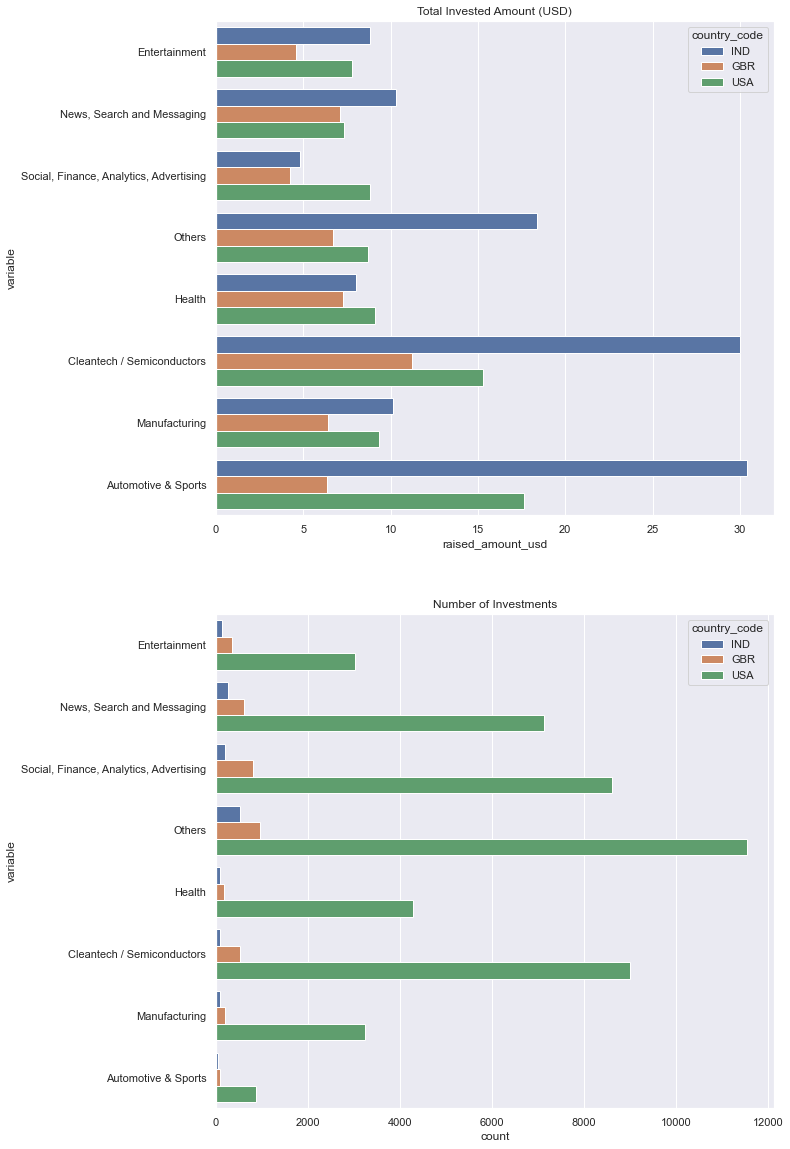

In [106]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
p = sb.barplot(y='variable', x='raised_amount_usd', hue='country_code', data=sector_analysis,ci=False)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sb.countplot(y='variable', hue='country_code', data=sector_analysis)
plt.title('Number of Investments')


plt.show()

In [ ]:
##### Interpretation:


1. Total number of investments (count)

In [80]:
#Total number of investments (count)
print('D1 :',D1.raised_amount_usd.count())
print('D2 :',D2.raised_amount_usd.count())
print('D3 :',D3.raised_amount_usd.count())

D1 : 11577
D2 : 607
D3 : 309


2. Total amount of investment (USD)

In [81]:
#Total amount of investment (USD)
print('D1 :',round(D1.raised_amount_usd.sum(), 2))
print('D2 :',round(D2.raised_amount_usd.sum(), 2))
print('D3 :',round(D3.raised_amount_usd.sum(), 2))

D1 : 103234.04
D2 : 5275.4
D3 : 2762.14


3. Top sector (based on count of investments)
4. Second-best sector (based on count of investments)
5. Third-best sector (based on count of investments)

* The 1st highest is *'Others'* based on the count investment.
* The second highest is *'Cleantech / Semiconductor'*.
* The third highest is *'Social/finance/analytics/advertising'*.

6. Number of investments in the top sector (refer to point 3)

In [86]:
a = D1[(D1.variable=='Others')]['variable'].count()
b = D2[(D2.variable=='Others')]['variable'].count()
c = D3[(D3.variable=='Others')]['variable'].count()
print("Total Number of investments in the top sector :",a+b+c)

Total Number of investments in the top sector : 3276


In [ ]:
7. Number of investments in the secondbest sector (refer to point 4)


In [87]:
a = D1[(D1.variable=='Cleantech / Semiconductors')]['variable'].count()
b = D2[(D2.variable=='Cleantech / Semiconductors')]['variable'].count()
c = D3[(D3.variable=='Cleantech / Semiconductors')]['variable'].count()
print("Total Number of investments in the secondbest sector :",a+b+c)

Total Number of investments in the secondbest sector : 2559


8. Number of investments in the third-best 
sector (refer to point 5)


In [88]:
a = D1[(D1.variable=='Social, Finance, Analytics, Advertising')]['variable'].count()
b = D2[(D2.variable=='Social, Finance, Analytics, Advertising')]['variable'].count()
c = D3[(D3.variable=='Social, Finance, Analytics, Advertising')]['variable'].count()
print("Total Number of investments in the third-best sector :",a+b+c)

Total Number of investments in the third-best sector : 2116


9. For the top sector count-wise (point 3), 
which company received the highest investment?

In [98]:
high_in = sector_analysis[sector_analysis['variable']=='Others']

In [102]:
pd.DataFrame(high_in.groupby(by='permalink')['raised_amount_usd'].sum().sort_values(ascending=False)).head(1)

,raised_amount_usd
permalink,
/organization/freescale,17600.0


*These are the companies which are received highest investment*

10. For the second-best sector count-wise 
(point 4), which company received the 
highest investment?


In [103]:
high_in = sector_analysis[sector_analysis['variable']=='Cleantech / Semiconductors']
pd.DataFrame(high_in.groupby(by='permalink')['raised_amount_usd'].sum().sort_values(ascending=False)).head(1)

,raised_amount_usd
permalink,
/organization/freescale,17600.0


### Checkpoint 6: Plots

In [141]:
#Retaining the rows with only four investment types
investment_types = master_frame[(master_frame['funding_round_type'] == 'venture') | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')| (master_frame['funding_round_type'] == 'private_equity')]
investment_types.head(3)

,permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,01-03-2014,700000.0


In [ ]:
#Extracting the primary vector value
investment_types['primary_sector'] = investment_types['category_list'].apply(lambda x: x.split('|')[0])
investment_types.head()


In [131]:
investment_types.shape

(75123, 8)

In [132]:
# merge the data frames
tab_data = pd.merge(investment_types, mapping, how='inner', on='primary_sector')
tab_data.head()

,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,primary_sector,variable
0,/organization/-fame,#fame,Media,operating,IND,venture,10.00000,Media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,15.00000,Media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,5.80000,Media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,venture,18.00000,Media,Entertainment
4,/organization/akira-mobile,Akira Mobile,Media|Mobile|SMS|Telecommunications,operating,LTU,seed,0.01841,Media,Entertainment


In [133]:
tab_data.shape

(69620, 9)

In [134]:
tab_data.to_csv('final_data')

As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she 
wants to see the following plots:
    






1. A plot showing the fraction of total investments (globally) in venture, seed, and private 
equity, and the average amount of investment in each funding type. This chart should 
make it clear that a certain funding type (FT) is best suited for Spark Funds.

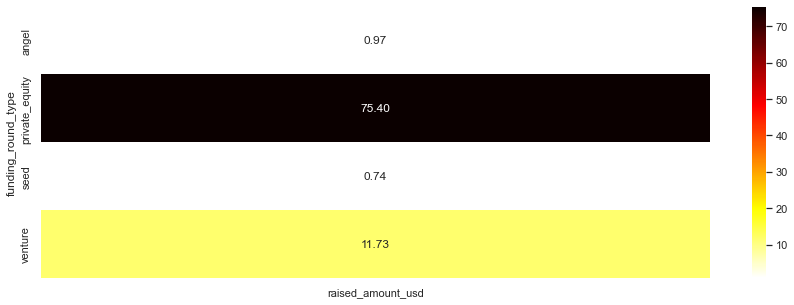

In [137]:
a = pd.pivot_table(tab_data,index='funding_round_type',values='raised_amount_usd',aggfunc='mean')
plt.figure(figsize=(15,5))
sb.heatmap(a,annot=True,fmt='.2f',cmap='hot_r')
plt.show()

2. A plot showing the top 9 countries against the total amount of investments of funding 
type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) 
very clear.


3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on 
one chart (for the chosen investment type FT).

##### Interpretation :

* Funding type - Venture has the highest amount of investment.
* USA, Britain and India are the countries with highest investment amount and it has large number of english speaking people.
----------------------
* The 1st highest is 'Others' based on the count investment.
* The second highest is 'Cleantech / Semiconductor'.
* The third highest is 'Social/finance/analytics/advertising'.
----------------------
* But the total invested amount is High for 'Cleantech / Semiconductor' than compared to 'Others' and 'Social/finance/analytics/advertising'
* The second highest amount invested in 'automotive and sports' but the number of ivestments are very low.